# Parks
This dataset hosts geographical data regarding parks in Pittsburgh.

## Datasets
[City of Pittsburgh Parks](https://data.wprdc.org/dataset/parks) and [Parks](https://data.wprdc.org/dataset/parks1)

## Metric
For the purposes of this notebook, a neighborhood is considered better than another if it has a higher acreage of parks than the other.

## Code

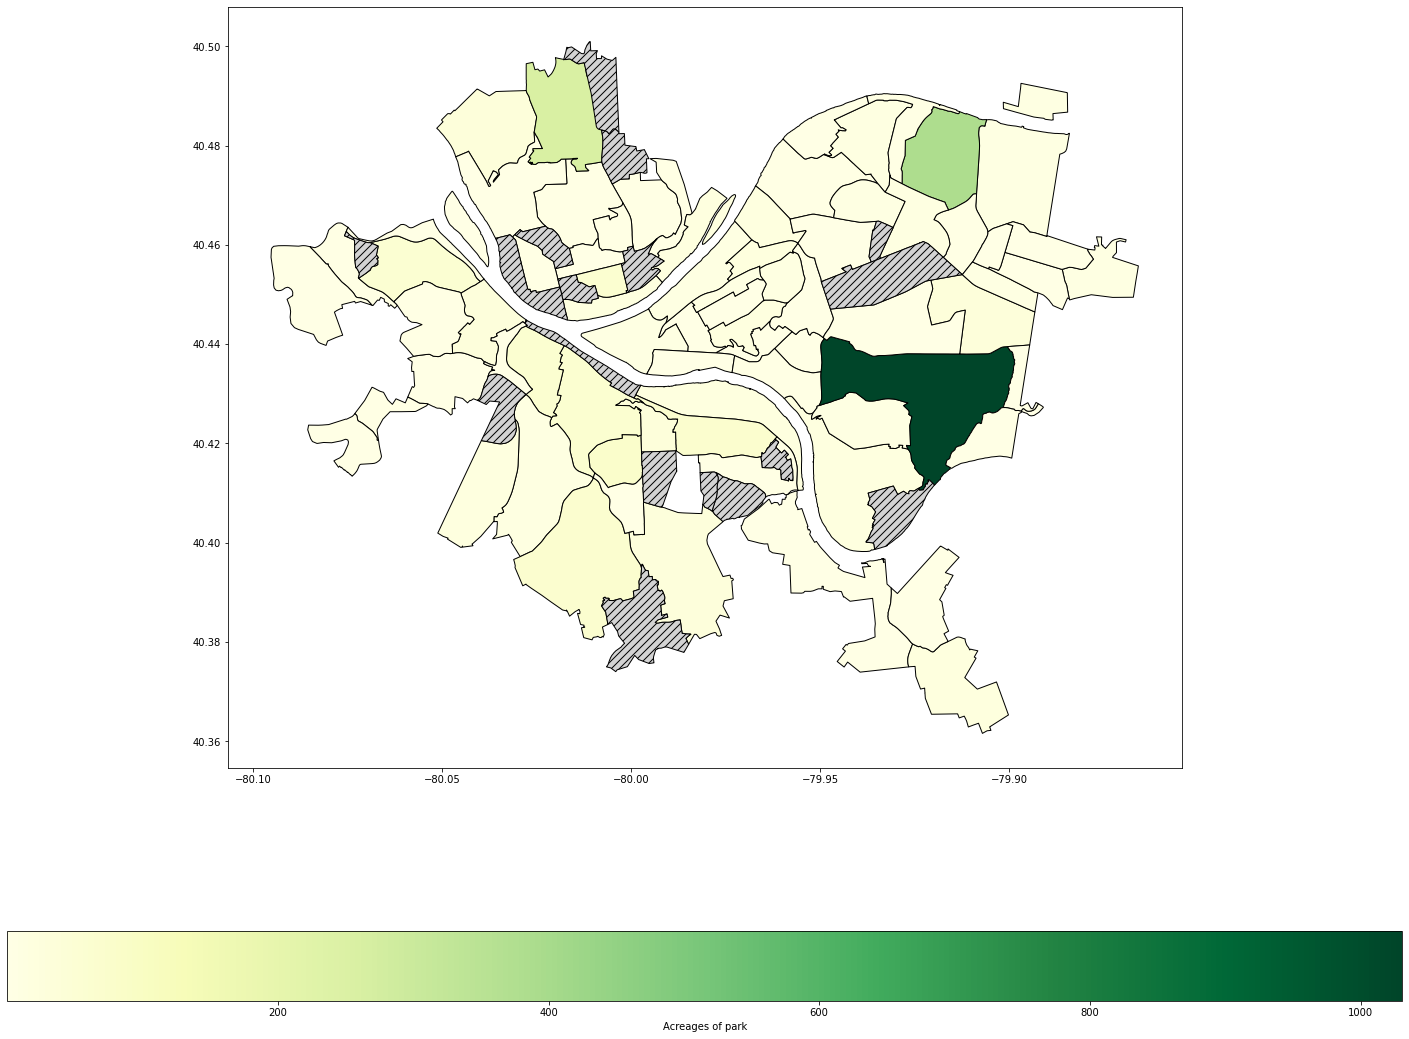

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt
import sys
%matplotlib inline      
        
class Edge:
    def __init__(self, source, destination, weight=1):
        self.source = source
        self.destination = destination
        self.weight = weight
        
class Vertex:
    def __init__(self, name, acreage=0):
        self.name = name
        self.acreage = acreage
        self.connections = []
        
    def addEdge(self, destination, weight=1):
        e = Edge(self, destination, weight)
        self.connections.append(e)
        
    def getDistanceTo(self, destination):
        for edge in self.connections:
            if edge.destination == destination:
                return edge.weight
            
    def __eq__(self, other):
        return self.name==other.name

# CSV Imports
city_parks = pd.read_csv('city_parks.csv')
parks = pd.read_csv('parks.csv')

# Shapefile imports (used by geopandas to make maps)
parks_shape = gpd.read_file('Parks.shp')
neighborhoods = gpd.read_file('../neighborhood/Neighborhoods_.shp')

# Merge the dataframes on the park names (which is shared across datasets), 
# we'll use this to eventually group by neighborhood
# and then gather location and area data.
merged_parks = pd.merge(city_parks, parks, on='name')
# Then get the acreage out of those and sort descending, so the neighborhood
# with the highest acreage of park comes out on top.
acreages = merged_parks.groupby('neighborhood')['acreage'].sum().sort_values(ascending=False)

# Finally make a map merging neighborhood information with the acreage information we got from the dataframes.
acres_map_df = neighborhoods.merge(acreages.rename('acreage'), how='left', left_on='hood', right_on='neighborhood')
acres_map = acres_map_df.plot(#ax=parks_map,
               column='acreage',
               cmap='YlGn',
               edgecolor='black', 
               legend=True, 
               legend_kwds={'label':'Acreages of park', 'orientation':'horizontal'}, 
               figsize=(25,20),
               missing_kwds={'color':"lightgrey", "hatch":"///"}
              )

# Must use data structures defined above to make graph used for modified acreages.